In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [24]:
import os
import numpy as np
from DataLoader3 import load_images_from_selected_classes

# Define the classes you want to sample images from
selected_classes = ['Apple Braeburn', 'Banana', 'Lemon', 'Limes']

# Path to the folder containing the images
base_folder_path = "C:/Users/aemsh/Desktop/DATA4380/ComputerVision/fruits-360_dataset/fruits-360/Training"

# Load and resize images from selected classes
loaded_images_dict = load_images_from_selected_classes(selected_classes, base_folder_path)

# Convert the loaded images per class into an array list
images_array_dict = {}
for class_name, images in loaded_images_dict.items():
    images_array_dict[class_name] = np.array(images)

In [26]:
# Load and resize images from selected classes
loaded_images_dict = load_images_from_selected_classes(selected_classes, base_folder_path)

# Convert the loaded images per class into an array list
images_array_dict = {}
for class_name, images in loaded_images_dict.items():
    images_array_dict[class_name] = np.array(images)

# Transpose the dimensions of images_array to (num_samples, height, width, channels)
images_array = np.transpose(images_array, (0, 1, 2, 4, 3))

# Define the augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,      # Rotate images randomly by up to 20 degrees
    width_shift_range=0.2,  # Shift images horizontally by up to 20% of the width
    height_shift_range=0.2, # Shift images vertically by up to 20% of the height
    shear_range=0.2,        # Apply shear transformation with max intensity of 20%
    zoom_range=0.2,         # Zoom in/out on images by up to 20%
    horizontal_flip=True,   # Flip images horizontally
    vertical_flip=True,     # Flip images vertically
    fill_mode='nearest'     # Fill in missing pixels using nearest neighbors
)


Generating augmented images for class: Apple Braeburn


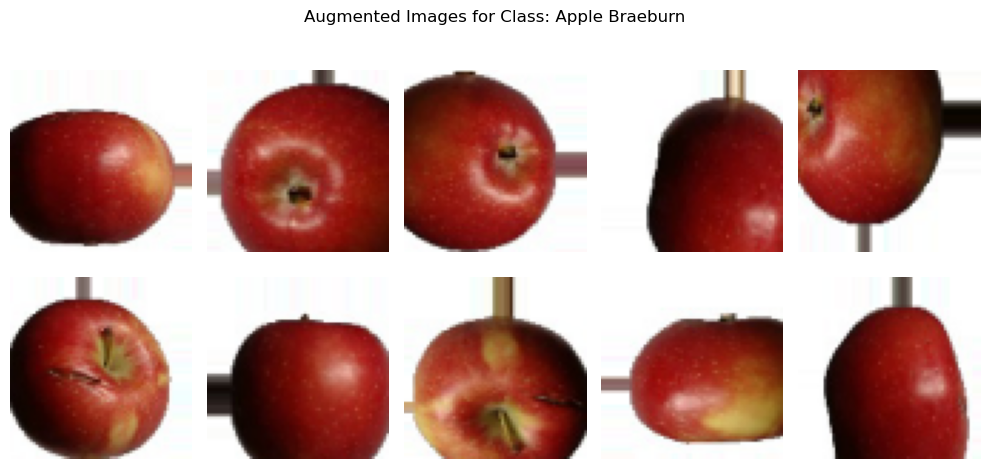

Generating augmented images for class: Banana


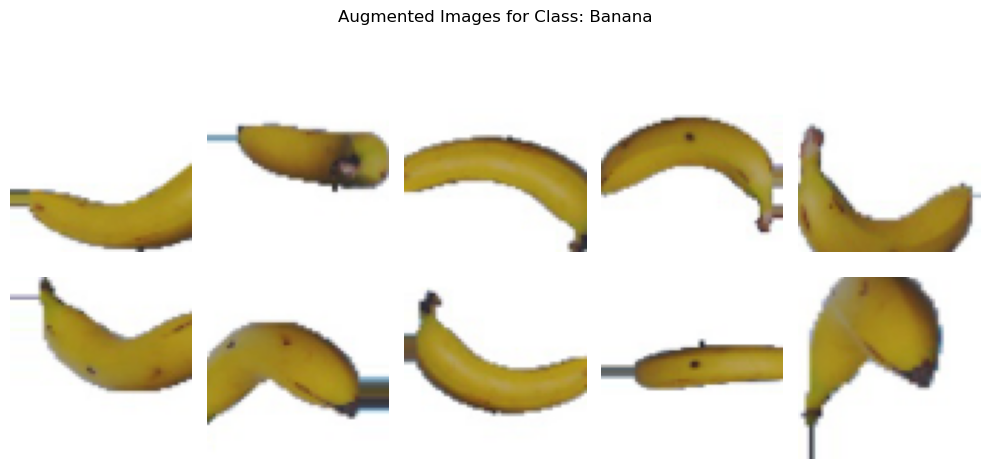

Generating augmented images for class: Lemon


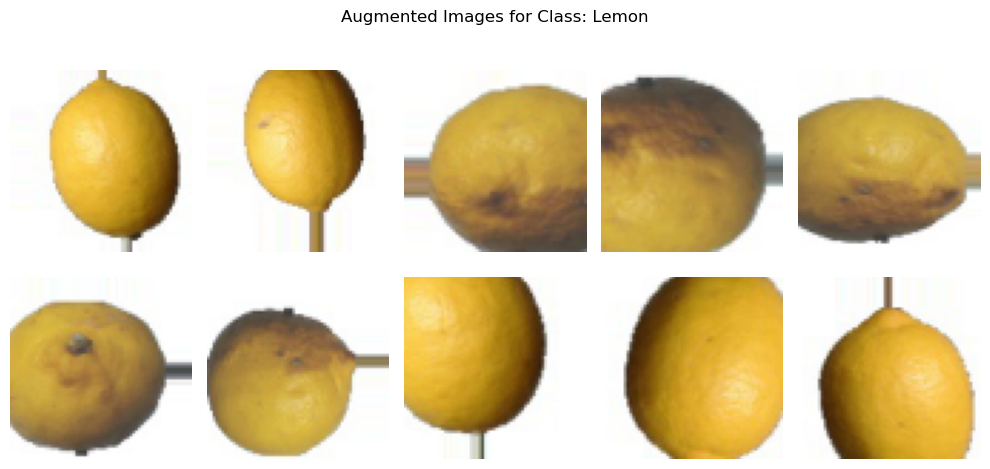

Generating augmented images for class: Limes


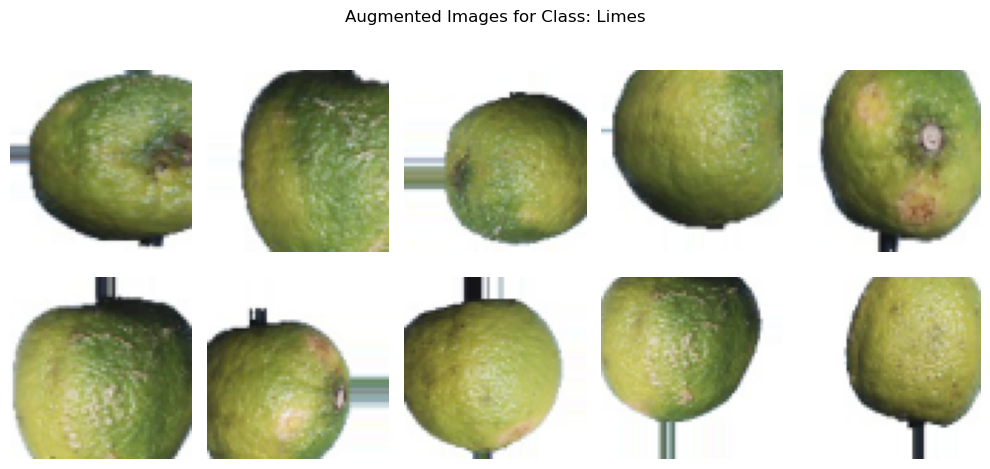

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize the ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)

# Generate augmented images for each class
for class_name, images in images_array_dict.items():
    print(f"Generating augmented images for class: {class_name}")
    
    # Reshape images to rank 4 tensor
    images = images.reshape(images.shape[0], images.shape[1], images.shape[2], 3)
    
    # Initialize generator for this class
    generator = datagen.flow(images, batch_size=1, shuffle=False)
    
    # Initialize subplot
    plt.figure(figsize=(10, 5))
    
    # Generate augmented images
    num_augmented_images = 0
    for batch in generator:
        augmented_image = batch[0]
        # Resize the augmented image
        resized_image = cv2.resize(augmented_image.astype(np.uint8), (64, 64))  # Change the size as needed
        # Plot the augmented image
        plt.subplot(2, 5, num_augmented_images + 1)
        plt.imshow(resized_image)
        plt.axis('off')
        num_augmented_images += 1
        if num_augmented_images >= 10:  # Generate 10 augmented images per class
            break
    
    plt.suptitle(f"Augmented Images for Class: {class_name}")
    plt.tight_layout()
    plt.show()


In [14]:
# Define the classes you want to sample images from
selected_classes = ['Apple Braeburn', 'Banana', 'Lemon', 'Limes']

# Path to the folder containing the images
base_folder_path = "C:/Users/aemsh/Desktop/DATA4380/ComputerVision/fruits-360_dataset/fruits-360/Training"

# Load images from selected classes
#loaded_images_dict = load_images_from_selected_classes(selected_classes, base_folder_path, num_images=10)
loaded_images_dict = load_images_from_selected_classes(selected_classes, base_folder_path, num_images_per_class=10)


# Visualize the loaded images for each class
for class_name, images in loaded_images_dict.items():
    visualize_images(images, class_name)

# Choose a sample image from each class for augmentation
sample_images = []
for class_name, images in loaded_images_dict.items():
    sample_images.extend(images)

# Convert sample images to the format expected by ImageDataGenerator
x = np.array(sample_images)
x = x.reshape((len(sample_images),) + sample_images[0].shape)

# Generate augmented images
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % len(selected_classes) == 0:  # Generate and display 10 augmented images per class
        break

plt.show()


NameError: name 'plt' is not defined

In [ ]:
# Visualize augmented images
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load a sample image
img_path = 'path_to_sample_image.jpg'  # Replace with the path to your sample image
img = image.load_img(img_path, target_size=(150, 150))  # Load image and resize to desired input size

# Convert image to numpy array
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

# Generate augmented images
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:  # Generate and display 4 augmented images
        break

plt.show()


In [ ]:
# Choose a sample image from the loaded dataset
sample_image = images_array_dict[desired_class_name][desired_image_index]

# Convert sample image to the format expected by ImageDataGenerator
x = sample_image.reshape((1,) + sample_image.shape)

# Generate augmented images
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:  # Generate and display 4 augmented images
        break

plt.show()
